In [3]:
## Machine Learning Online Class - Exercise 1: Linear Regression

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#   
#     PART#02
#         OPTIMIZATION FUNCTIONS
#         LEARNING RATE
#
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
# X refers to the population size in 10,000s
# Y refers to the profit in $10,000s
	

#Write the code below every comment
import numpy as np
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/ex1data1.txt"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 1
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 90
         Function evaluations: 172


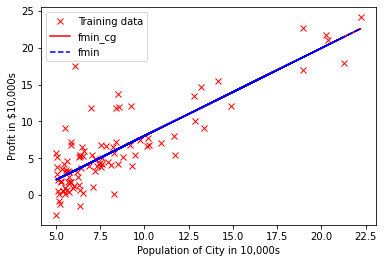

[-3.89578088  1.19303364]
[-3.89582121  1.19303713]


In [17]:
import matplotlib.pyplot as plt

# used for manipulating directory paths
import os

from pylab import *
from numpy import *
from numpy.random import normal
from scipy.optimize import fmin_cg

# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]
m=len(Y)


args=(X,Y)  # parameter values
al=1
lr2=[]

#--------  COST FUNCTION-------------
def J(t,x,y):
  theta=t
  #============YOUR COST FUNCTION CODE HERE====
  h = np.dot((np.stack([np.ones(m), x], axis=1)),theta)
  J = (1/(2*m)) * sum(np.square(h-y))
  #=====================================
  lr2.append(J)
  return J


# -----------GRADIENT ONLY FUNCTION-----------
def gradf(t, *args):
  theta = t
  #========GRADIENT ONLY CODE HERE=======   
  for i in range(100):
    X,y = args
    h = np.dot((np.stack([np.ones(m), X], axis=1)), theta)
    grad_0 = (1/m) * sum(h - y)
    grad_1 = (1/m) * sum(X * (h - y))
    theta[0] = theta[0] - 0.02 * (grad_0)
    theta[1] = theta[1] - 0.02 * (grad_1)
    # ===================================
    J = (1/(2*m)) * sum(np.square(h-y))
    #======================================
    lr2.append(J)
  return np.asarray((grad_0, grad_1))

x0 = np.zeros(2)  # Initial guess.
from scipy import optimize

res1 = optimize.fmin_cg(J, x0, fprime=gradf,args=args)
lr1=lr2
lr2=[]
res2 = optimize.fmin(J, x0, args=args)

X = np.stack([np.ones(m), X], axis=1)

plot(X[:,1],Y,'rx', X[:,1],np.dot(X, res1),'r', X[:,1], np.dot(X, res2),'b--')
plt.ylabel('Profit in $10,000s'); # Set the y ? axis label
plt.xlabel('Population of City in 10,000s'); # Set the x ? axis label
plt.legend([ 'Training data','fmin_cg','fmin']);
plt.show()
print(res1)
print(res2)

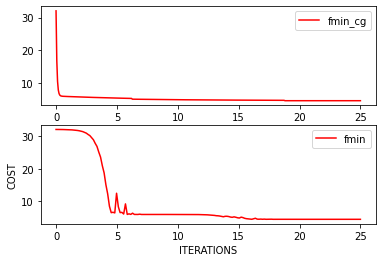

In [18]:
# plot learning rates of fmin and fmin_cg
xx = linspace(0,25,len(lr1))
xy = linspace(0,25,len(lr2))

plt.subplot(2,1,1)  
plt.plot( xx,lr1,'r',label='fmin_cg') # (lr1) learning rate 1 of fmin_cg
plt.legend()
plt.subplot(2,1,2)
plt.plot( xy,lr2,'r',label='fmin')  # (lr2)  learning rate 1 of fmin_cg
plt.ylabel('COST'); # Set the y  axis label
plt.xlabel('ITERATIONS'); # Set the x  axis label 
plt.legend() 
show()